In [142]:
#2019 running back analysis
#import pandas
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns

#load data
csv_path = '/Users/tylerchurch/Downloads/2019.csv'
df = pd.read_csv(csv_path)

# check data
#df.head()

In [143]:
#data attributes
print(df.shape)
print(df.shape[0], 'players to analyze')
print(df.shape[1], 'columns of data')
df.__class__


(620, 28)
620 players to analyze
28 columns of data


pandas.core.frame.DataFrame

In [144]:
#filter out rb data 
df = df.loc[df['Pos'] == 'RB', ['Player', 'Tgt', 'RushingAtt', 'FantasyPoints']]
df['Usage']=df['Tgt'] + df['RushingAtt']
df.head()


,Player,Tgt,RushingAtt,FantasyPoints,Usage
0,Christian McCaffrey,142.0,287.0,469.2,429.0
2,Derrick Henry,24.0,303.0,294.6,327.0
3,Aaron Jones,68.0,236.0,314.8,304.0
4,Ezekiel Elliott,71.0,301.0,311.7,372.0
5,Dalvin Cook,63.0,250.0,292.4,313.0


In [145]:
#sort and rank
df['UsageRank'] = df['Usage'].rank(ascending=False)
df["FantasyPointsRank"] = df['FantasyPoints'].rank(ascending=False)
df.sort_values(by='UsageRank').head(15)


,Player,Tgt,RushingAtt,FantasyPoints,Usage,UsageRank,FantasyPointsRank
0,Christian McCaffrey,142.0,287.0,469.2,429.0,1.0,1.0
4,Ezekiel Elliott,71.0,301.0,311.7,372.0,2.0,3.0
28,Leonard Fournette,100.0,265.0,259.4,365.0,3.0,7.0
8,Nick Chubb,49.0,298.0,255.2,347.0,4.0,8.0
2,Derrick Henry,24.0,303.0,294.6,327.0,5.0,5.0
17,Chris Carson,47.0,278.0,232.6,325.0,6.0,12.0
62,Le'Veon Bell,78.0,245.0,213.0,323.0,7.5,16.0
22,Joe Mixon,45.0,278.0,225.4,323.0,7.5,13.0
5,Dalvin Cook,63.0,250.0,292.4,313.0,9.0,6.0
3,Aaron Jones,68.0,236.0,314.8,304.0,10.0,2.0


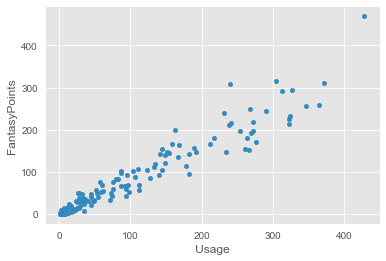

In [146]:
#plot
plt.style.use('ggplot')
df.plot(x='Usage', y='FantasyPoints', kind='scatter')

In [147]:
#corelation coefficient
def covariance(x,y):
    n=len(x)
    return sum((x - np.mean(x)) * (y - np.mean(y))) * 1/(n-1)
def corr(x,y):
    return covariance(x,y)/(np.std(x) * np.std(y))
x = df['Usage'].values
y = df['FantasyPoints'].values
corr(x,y)

0.967330979222704

In [148]:
#Linear regression model
X = df['Usage'].values
Y = df['FantasyPoints'].values
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)


In [149]:
#new data
df1 = pd.read_csv('/Users/tylerchurch/Downloads/2019 (1).csv')

In [150]:
#drop column
df1.drop(['Rk', '2PM', '2PP', 'FantPt', 'DKPt', 'FDPt', 'VBD', 
          'PosRank', 'OvRank', 'PPR', 'Fmb', 'GS'], axis=1, inplace=True)

In [151]:
#fix player name
df1['Player']=df1['Player'].apply(lambda x: x.split('*')[0]).apply(lambda x: x.split('\\')[0])

In [152]:
#rename columns
df1.rename({'TD': 'PassingTD', 'TD.1': 'RushingTD', 'TD.2': 'ReceivingTD', 'TD.3': 'TotalTD', 'Yds': 'PassingYDs',
           'Yds.1': 'RushingYDs', 'Yds.2': 'ReceivingYDs', 'Att': 'PassingAtt', 'Att.1': 'RushingAtt'}, 
           axis=1, inplace=True)
#df1.head()

In [153]:
#seperate by position
rb_df = df1[df1['FantPos'] == 'RB']
qb_df = df1[df1['FantPos'] == 'QB']
wr_df = df1[df1['FantPos'] == 'WR']
te_df = df1[df1['FantPos'] == 'TE']


In [154]:
#seperate stats
rushing_columns = ['RushingAtt', 'RushingYDs', 'Y/A', 'RushingTD']
receiving_columns = ['Tgt', 'Rec', 'ReceivingYDs', 'Y/R', 'ReceivingTD']
passing_columns = ['PassingAtt', 'PassingYDs', 'PassingTD', 'Int']

def transform_columns(df, new_column_list):
    df = df[['Player','Tm','Age','G'] + new_column_list +['FL']]
    return df

In [155]:
#new df
rb_df = transform_columns(rb_df, rushing_columns+receiving_columns)
wr_df = transform_columns(wr_df, rushing_columns+receiving_columns)
te_df = transform_columns(te_df, receiving_columns)
qb_df = transform_columns(qb_df, passing_columns)

In [156]:
#te_df.head()

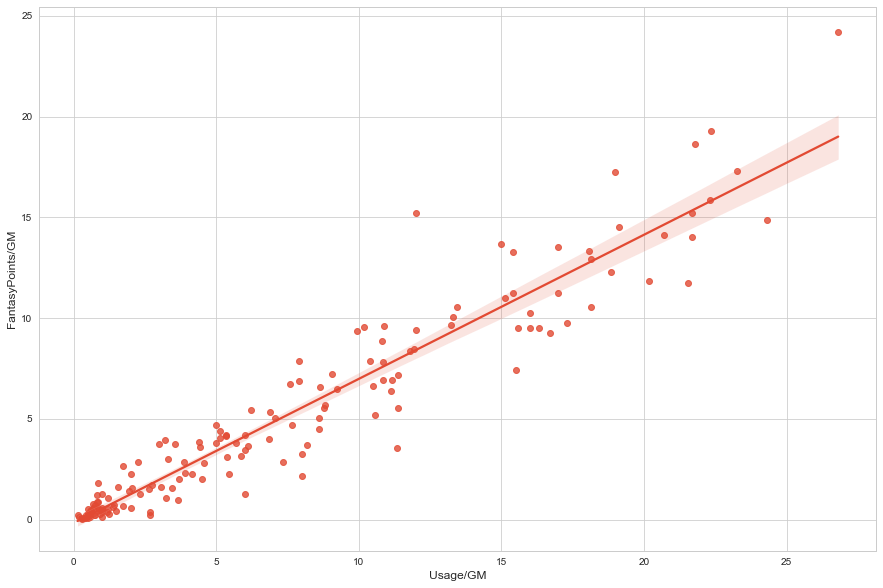

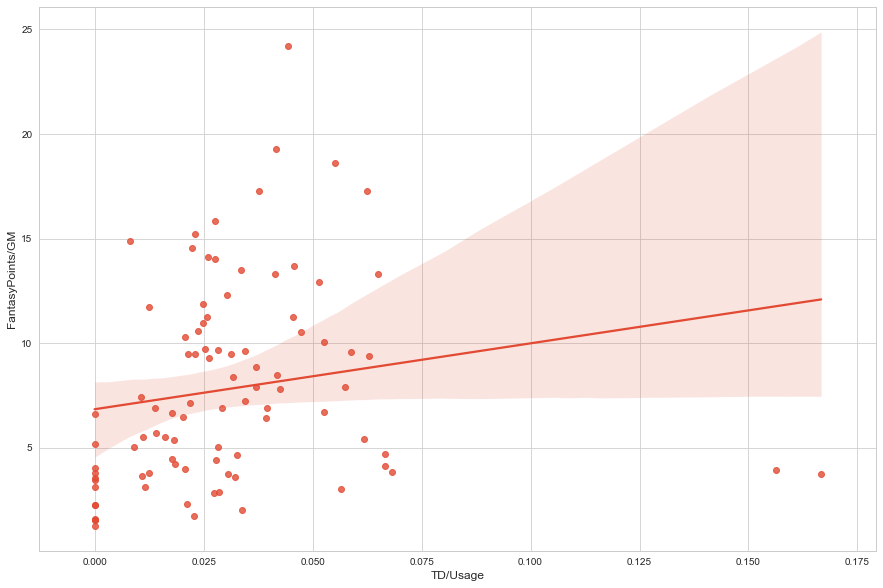

In [157]:
#looking at rb usage and fantasy points
#calculate total fantasy points
rb_df['FantasyPoints'] = (rb_df['RushingYDs']*0.1 + rb_df['RushingTD']*6 + rb_df['Rec']*0.5 + rb_df['ReceivingYDs']*0.1
+ rb_df['ReceivingTD']*6 - rb_df['FL']*2)

#calculate fantasy points a game
rb_df['FantasyPoints/GM'] = rb_df['FantasyPoints']/rb_df['G']
rb_df['FantasyPoints/GM'] = rb_df['FantasyPoints/GM'].apply(lambda x: round(x, 2))

#calculate usage per game
rb_df['Usage/GM'] = (rb_df['RushingAtt'] + rb_df['Tgt'])/rb_df['G']
rb_df['Usage/GM'] = rb_df['Usage/GM'].apply(lambda x: round(x, 2))

#rushing att per game
rb_df['RushingAtt/GM'] = rb_df['RushingAtt']/rb_df['G']
rb_df['RushingAtt/GM'] = rb_df['RushingAtt/GM'].apply(lambda x: round(x, 2))

#plot
sns.set_style('whitegrid')
fig, ax = plt.subplots()
fig.set_size_inches(15,10)
plot = sns.regplot(x = rb_df['Usage/GM'], y = rb_df['FantasyPoints/GM'], scatter=True)

#efficieny and fantasy points
#create td per usage column
rb_df['TD/Usage'] = (rb_df['RushingTD'] + rb_df['ReceivingTD']) / (rb_df['RushingAtt'] + rb_df['Tgt'])

#plot TD/Usage and FP/GM
fig, ax = plt.subplots()
fig.set_size_inches(15,10)
rb_df = rb_df[rb_df['RushingAtt'] > 20]

plot = sns.regplot(x = rb_df['TD/Usage'], y = rb_df['FantasyPoints/GM'], scatter=True)


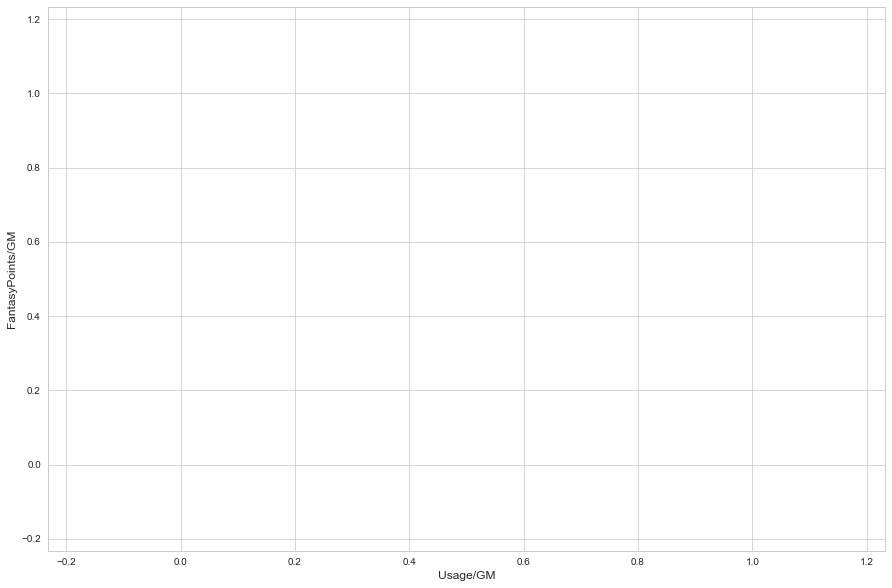

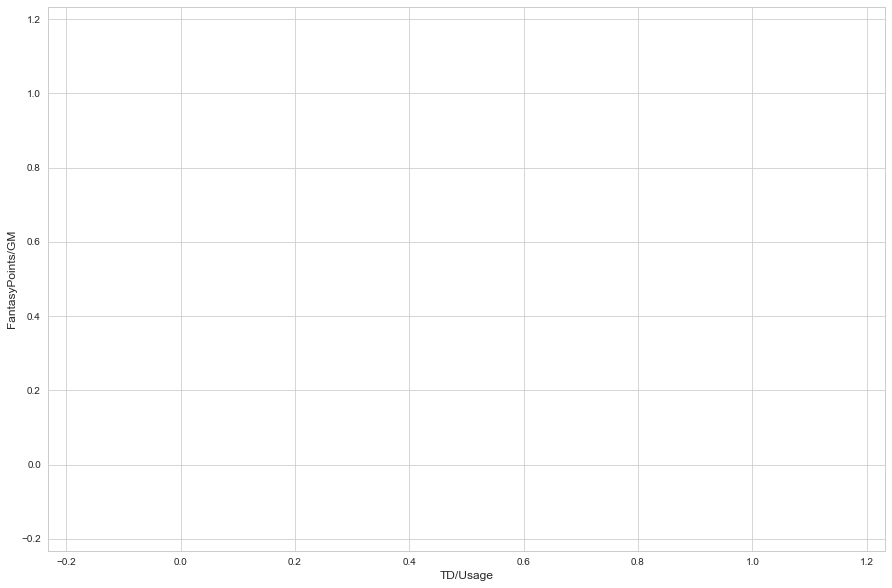

In [158]:
#looking at wr usage and fantasy points
#calculate total fantasy points
wr_df['FantasyPoints'] = wr_df['RushingYDs']*0.1 + wr_df['RushingTD']*6 + wr_df['Rec']*0.5 + wr_df['ReceivingYDs']*0.1
+ wr_df['ReceivingTD']*6 - wr_df['FL']*2
wr_df.head()
#calculate fantasy points a game
wr_df['FantasyPoints/GM'] = wr_df['FantasyPoints']/rb_df['G']
wr_df['FantasyPoints/GM'] = wr_df['FantasyPoints/GM'].apply(lambda x: round(x, 2))

#calculate usage per game
wr_df['Usage/GM'] = (wr_df['RushingAtt'] + wr_df['Tgt'])/wr_df['G']
wr_df['Usage/GM'] = wr_df['Usage/GM'].apply(lambda x: round(x, 2))

#receiving tgt per game
wr_df['Tgt/GM'] = wr_df['Tgt']/wr_df['G']
wr_df['Tgt/GM'] = wr_df['Tgt'].apply(lambda x: round(x, 2))

#plot
sns.set_style('whitegrid')
fig, ax = plt.subplots()
fig.set_size_inches(15,10)
plot = sns.regplot(x = wr_df['Usage/GM'], y = wr_df['FantasyPoints/GM'], scatter=True)

#efficieny and fantasy points
#create td per usage column
wr_df['TD/Usage'] = (wr_df['RushingTD'] + wr_df['ReceivingTD']) / (wr_df['RushingAtt'] + wr_df['Tgt'])

#plot TD/Usage and FP/GM
fig, ax = plt.subplots()
fig.set_size_inches(15,10)
wr_df = wr_df[wr_df['Tgt'] > 20]

plot = sns.regplot(x = wr_df['TD/Usage'], y = wr_df['FantasyPoints/GM'], scatter=True)

#wr_df.head()

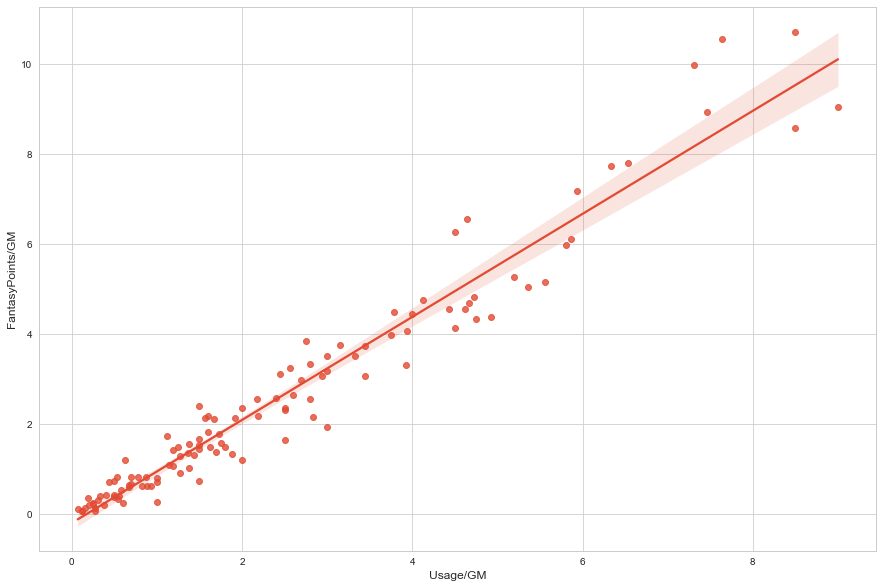

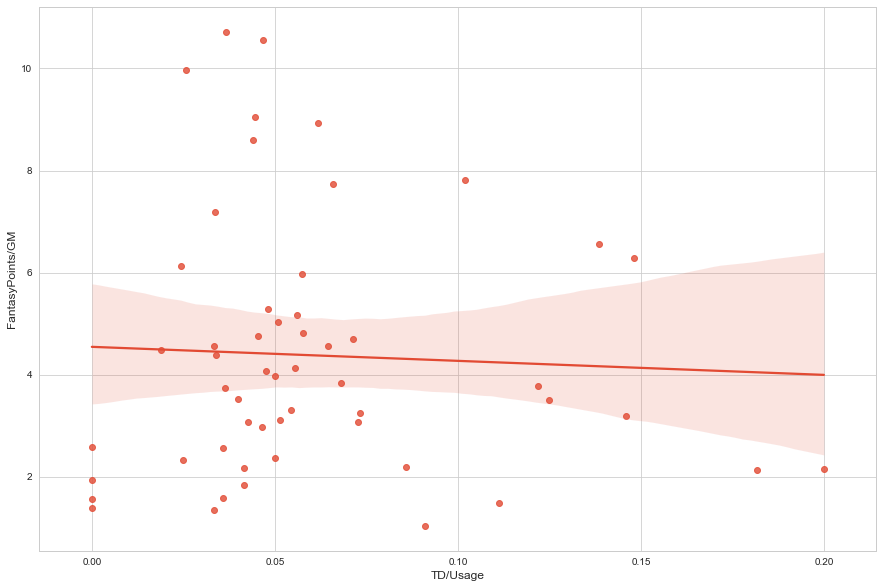

In [159]:
#looking at TE usage and fantasy points
#calculate total fantasy points
te_df['FantasyPoints'] = te_df['Rec']*0.5 + te_df['ReceivingYDs']*0.1
+ te_df['ReceivingTD']*6 - te_df['FL']*2


te_df.head()
#calculate fantasy points a game
te_df['FantasyPoints/GM'] = (te_df['FantasyPoints'])/(te_df['G'])
te_df['FantasyPoints/GM'] = te_df['FantasyPoints/GM'].apply(lambda x: round(x, 2))

#calculate usage per game
te_df['Usage/GM'] = (te_df['Tgt'])/te_df['G']
te_df['Usage/GM'] = te_df['Usage/GM'].apply(lambda x: round(x, 2))

#target per game
te_df['Tgt/GM'] = te_df['Tgt']/te_df['G']
te_df['Tgt/GM'] = te_df['Tgt/GM'].apply(lambda x: round(x, 2))

#plot
sns.set_style('whitegrid')
fig, ax = plt.subplots()
fig.set_size_inches(15,10)
plot = sns.regplot(x = te_df['Usage/GM'], y = te_df['FantasyPoints/GM'], scatter=True)

#efficieny and fantasy points
#create td per usage column
te_df['TD/Usage'] = (te_df['ReceivingTD']) / (te_df['Tgt'])

#plot TD/Usage and FP/GM
fig, ax = plt.subplots()
fig.set_size_inches(15,10)
te_df = te_df[te_df['Tgt'] > 20]

plot = sns.regplot(x = te_df['TD/Usage'], y = te_df['FantasyPoints/GM'], scatter=True)

#te_df.head()